In [1]:
from typing import Optional, Tuple, Type, Union

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyro
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
import torch
import torch.nn as nn
from scipy.stats import norm
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import medmnist

import warnings
warnings.filterwarnings("ignore", module="torchvision.datasets")

In [2]:
from src.models import *
from src.functions import *
from src.data import *
from src.rvae import *
from src.trainer import *
from src.classifier import *
from src.steps import *
from src.similarity import *

In [3]:
%load_ext autoreload
%autoreload 3

In [4]:
path_trainset = medmnist.PathMNIST(root='data/MedMNIST/', split='train', download=True)
path_testset = medmnist.PathMNIST(root='data/MedMNIST/', split='test', download=True)

Using downloaded and verified file: data/MedMNIST/pathmnist.npz
Using downloaded and verified file: data/MedMNIST/pathmnist.npz


In [5]:
retina_trainset = medmnist.RetinaMNIST(root='data/MedMNIST/', split='train', download=True)
retina_testset = medmnist.RetinaMNIST(root='data/MedMNIST/', split='test', download=True)

Using downloaded and verified file: data/MedMNIST/retinamnist.npz
Using downloaded and verified file: data/MedMNIST/retinamnist.npz


In [6]:
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.cuda.device_count())

True
1.12.0+cu113
8


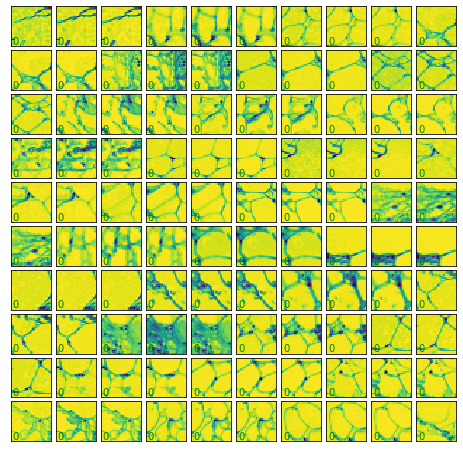

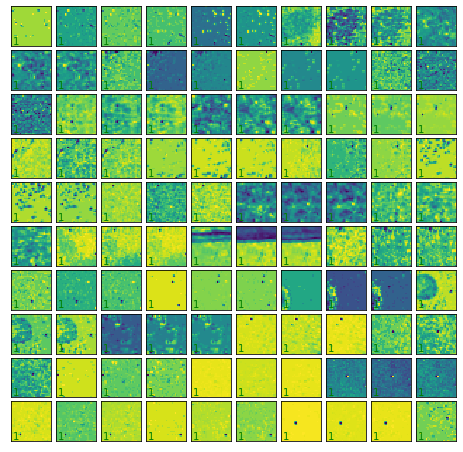

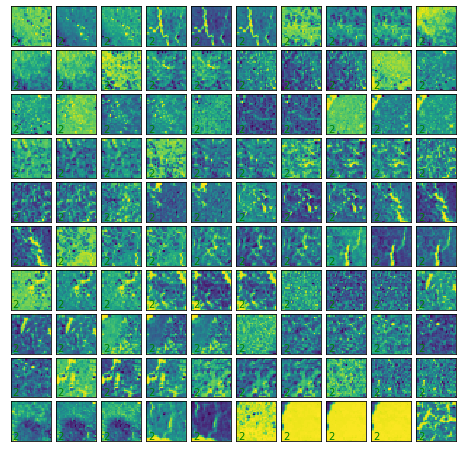

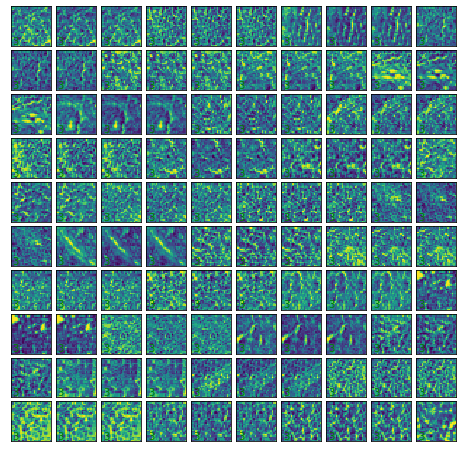

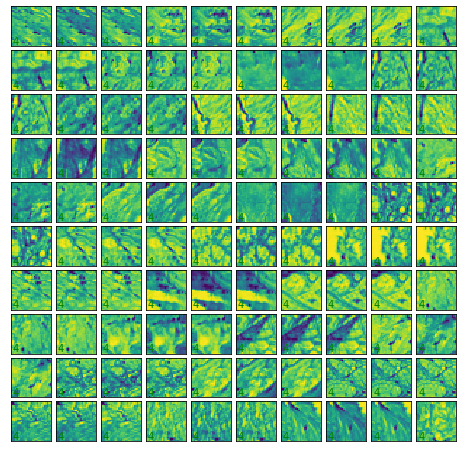

In [19]:
for i in range(5):
    train_data, train_labels, angles, translations = get_mnist_data(
        path_trainset, 
        digits = [i],
        coord = 0
        )

    fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    for ax, im, lbl in zip(axes.flat, train_data, train_labels):
        ax.imshow(im, interpolation='nearest')
        ax.text(0.05, 0.05, str(lbl.item()),
                transform=ax.transAxes, color='green')

### Trained PathMNIST Models

In [11]:
# Train on half of labels for ROC curves

# j = data_coord
# i = model_coord

# each model saved to 'saved_models/pathj_i_4.pkl'

for j in [1,2,3]:
    for i in [0,1,2,3]:
        # continue
        train_vae(path_trainset, f'path{j}_{i}_4', j, i, [0,1,2,3,4])

/usr/local/lib/python3.10/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|███████████████████████████████████████████████████████████████████████████| 100/100 [25:51<00:00, 15.51s/it]


Epoch: 100 Training loss: 414.9535


100%|██████████████████████████████████████████████| 100/100 [39:46<00:00, 23.86s/it]


Epoch: 100 Training loss: 432.7578


100%|██████████████████████████████████████████████| 100/100 [38:18<00:00, 22.99s/it]


Epoch: 100 Training loss: 425.3333


100%|██████████████████████████████████████████████| 100/100 [40:17<00:00, 24.17s/it]


Epoch: 100 Training loss: 442.6550


100%|██████████████████████████████████████████████| 100/100 [25:48<00:00, 15.49s/it]


Epoch: 100 Training loss: 393.5983


 27%|████████████▋                                  | 27/100 [17:05<46:12, 37.97s/it]


KeyboardInterrupt: 

### Pair Matching

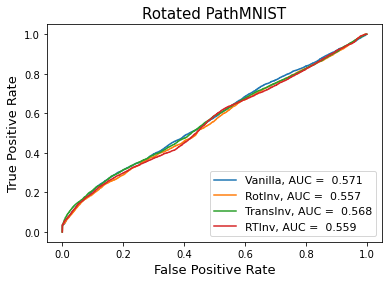

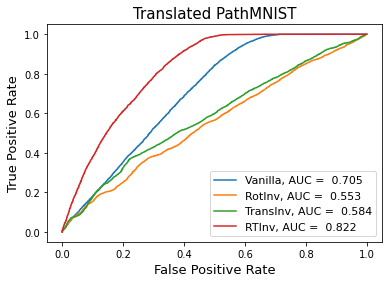

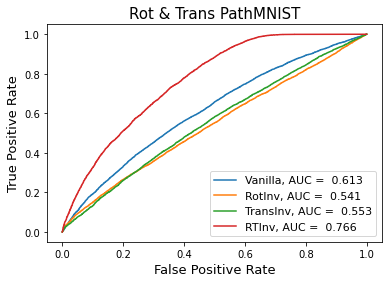

In [33]:
vaename = {0: "Vanilla", 1: "RotInv", 2: "TransInv", 3: "RTInv"}
dataname = {1: "Rotated", 2: "Translated", 3: "Rot & Trans"}

for j in [1,2,3]:
    plt.axes()
    for i in [0,1,2,3]:  
        vae = load_vae(f'path{j}_{i}_4', i)
        auc, fpr, tpr, thresholds = pair_matching(path_testset, [5,6,7,8], vae, j)
        plt.plot(fpr, tpr, label = f'{vaename[i]}, AUC = {auc: .3f}')

    plt.legend(loc='lower right', fontsize=11)
    plt.xlabel('False Positive Rate', fontsize = 13)
    plt.ylabel('True Positive Rate', fontsize = 13)
    plt.title(f'{dataname[j]} PathMNIST', fontsize = 15)
    plt.show()

### Class Matching

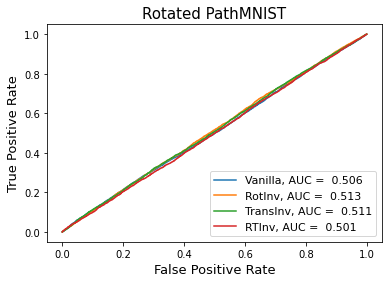

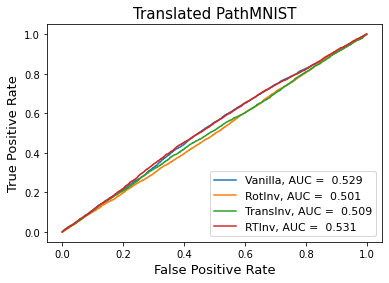

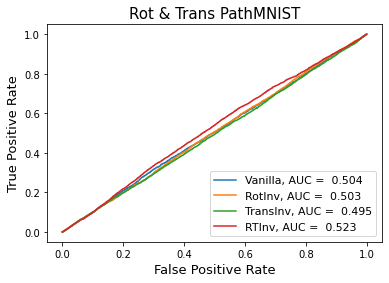

In [34]:
vaename = {0: "Vanilla", 1: "RotInv", 2: "TransInv", 3: "RTInv"}
dataname = {1: "Rotated", 2: "Translated", 3: "Rot & Trans"}

for j in [1,2,3]:
    plt.axes()
    for i in [0,1,2,3]:  
        vae = load_vae(f'path{j}_{i}_4', i)
        auc, fpr, tpr, thresholds = class_matching(path_testset, [5,6,7,8], vae, j)
        plt.plot(fpr, tpr, label = f'{vaename[i]}, AUC = {auc: .3f}')

    plt.legend(loc='lower right', fontsize=11)
    plt.xlabel('False Positive Rate', fontsize = 13)
    plt.ylabel('True Positive Rate', fontsize = 13)
    plt.title(f'{dataname[j]} PathMNIST', fontsize = 15)
    plt.show()